<a href="https://colab.research.google.com/github/Imshubhham/Imshubhham/blob/main/Diabetes_predictor_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,KBinsDiscretizer
from sklearn.model_selection import train_test_split
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.metrics import confusion_matrix

In [146]:
df = pd.read_csv('diabetes.csv')

In [147]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
276,7,106,60,24,0,26.5,0.296,29,1
196,1,105,58,0,0,24.3,0.187,21,0
447,0,95,80,45,92,36.5,0.330,26,0
168,4,110,66,0,0,31.9,0.471,29,0
88,15,136,70,32,110,37.1,0.153,43,1


In [148]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [150]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Pregnancies: 17 distinct values
Glucose: 136 distinct values
BloodPressure: 47 distinct values
SkinThickness: 51 distinct values
Insulin: 186 distinct values
BMI: 248 distinct values
DiabetesPedigreeFunction: 517 distinct values
Age: 52 distinct values
Outcome: 2 distinct values


In [151]:
df.describe().style.format("{:.2f}")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


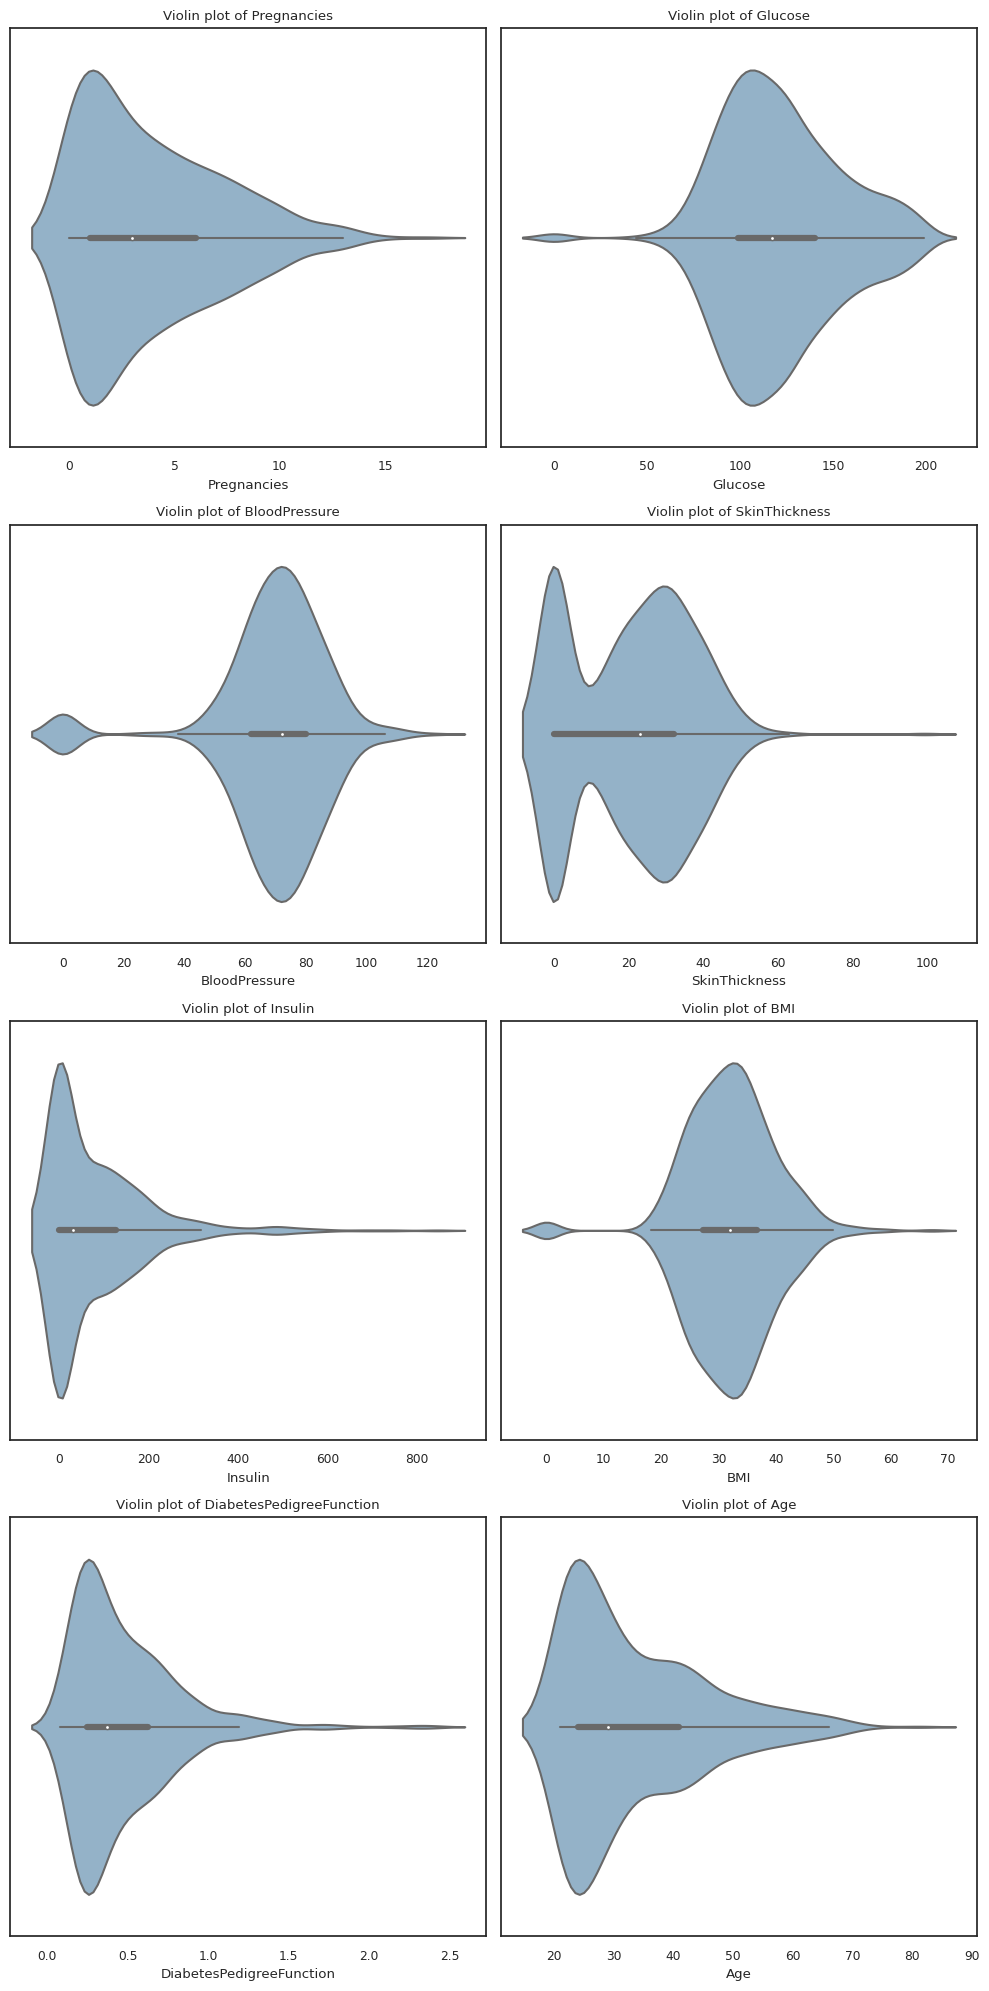

In [152]:
# Univariate Analysis
# Violin plots for each variable
num_columns = len(df.columns.drop('Outcome'))
num_rows = (num_columns + 1) // 2

plt.figure(figsize=(10, 5*num_rows))
for i, column in enumerate(df.columns.drop('Outcome')):
    plt.subplot(num_rows, 2, i+1)
    sns.violinplot(x=df[column])
    plt.title(f'Violin plot of {column}')

plt.tight_layout()
plt.show()

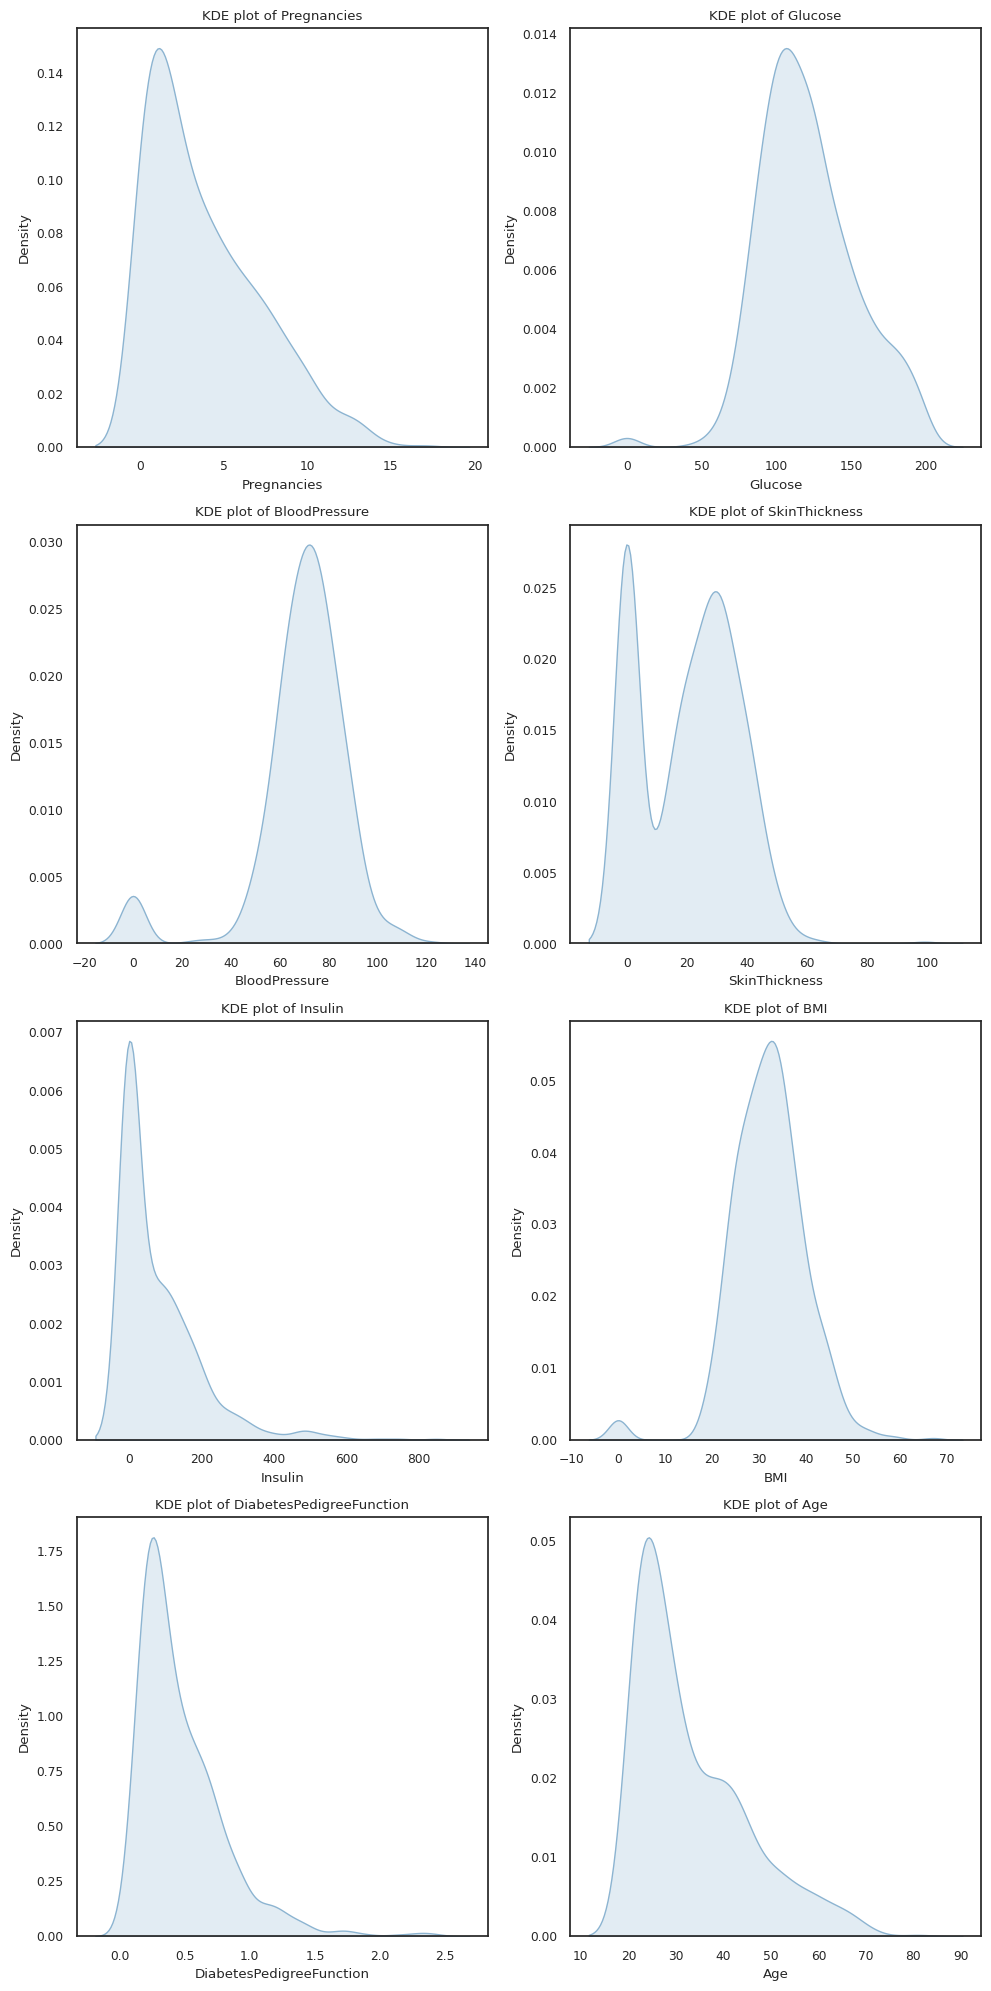

In [153]:
# Kernel Density Estimate (KDE) plots for each variable
num_columns = len(df.columns.drop('Outcome'))
num_rows = (num_columns + 1) // 2

plt.figure(figsize=(10, 5*num_rows))
for i, column in enumerate(df.columns.drop('Outcome')):
    plt.subplot(num_rows, 2, i+1)
    sns.kdeplot(data=df[column], fill=True)
    plt.title(f'KDE plot of {column}')

plt.tight_layout()
plt.show()

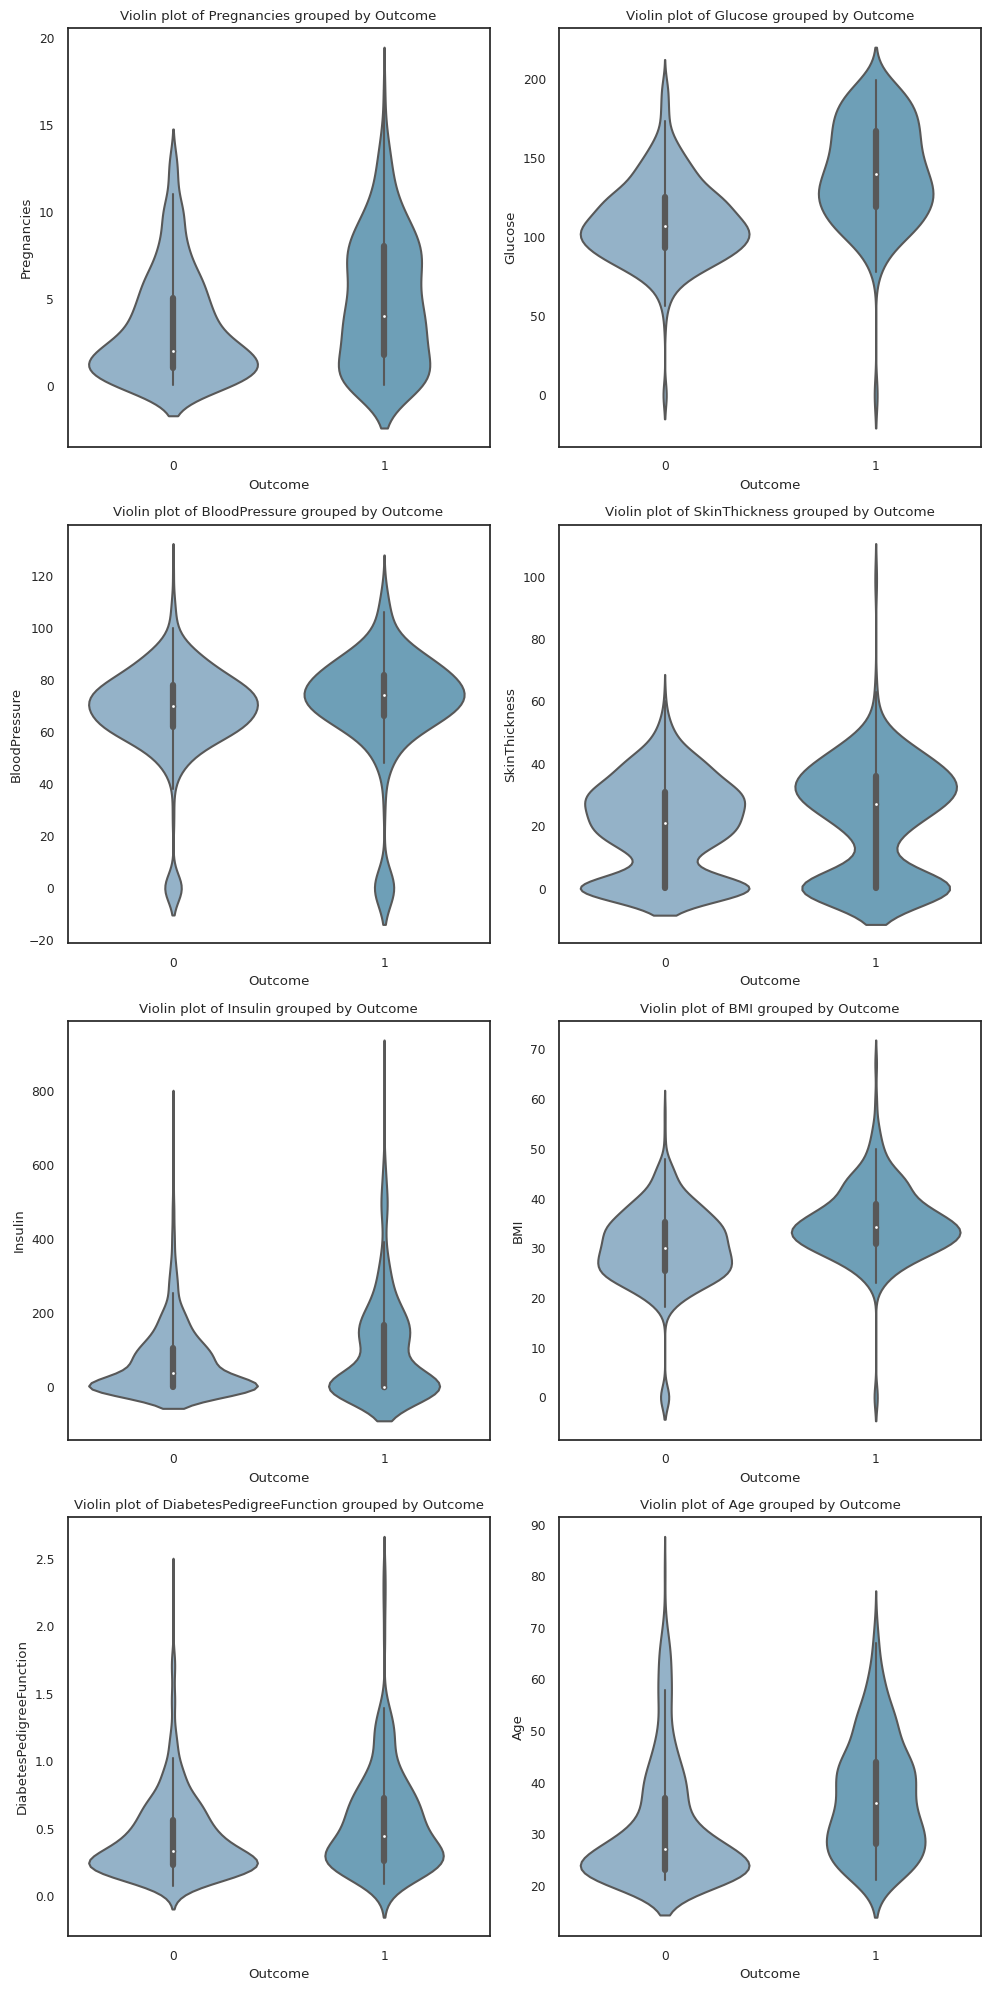

In [154]:
# Bivariate Analysis
# Violin plots for each variable grouped by the Outcome
num_columns = len(df.columns.drop('Outcome'))
num_rows = (num_columns + 1) // 2

plt.figure(figsize=(10, 5*num_rows))
for i, column in enumerate(df.columns.drop('Outcome')):
    plt.subplot(num_rows, 2, i+1)
    sns.violinplot(data=df, x='Outcome', y=column)
    plt.title(f'Violin plot of {column} grouped by Outcome')

plt.tight_layout()
plt.show()

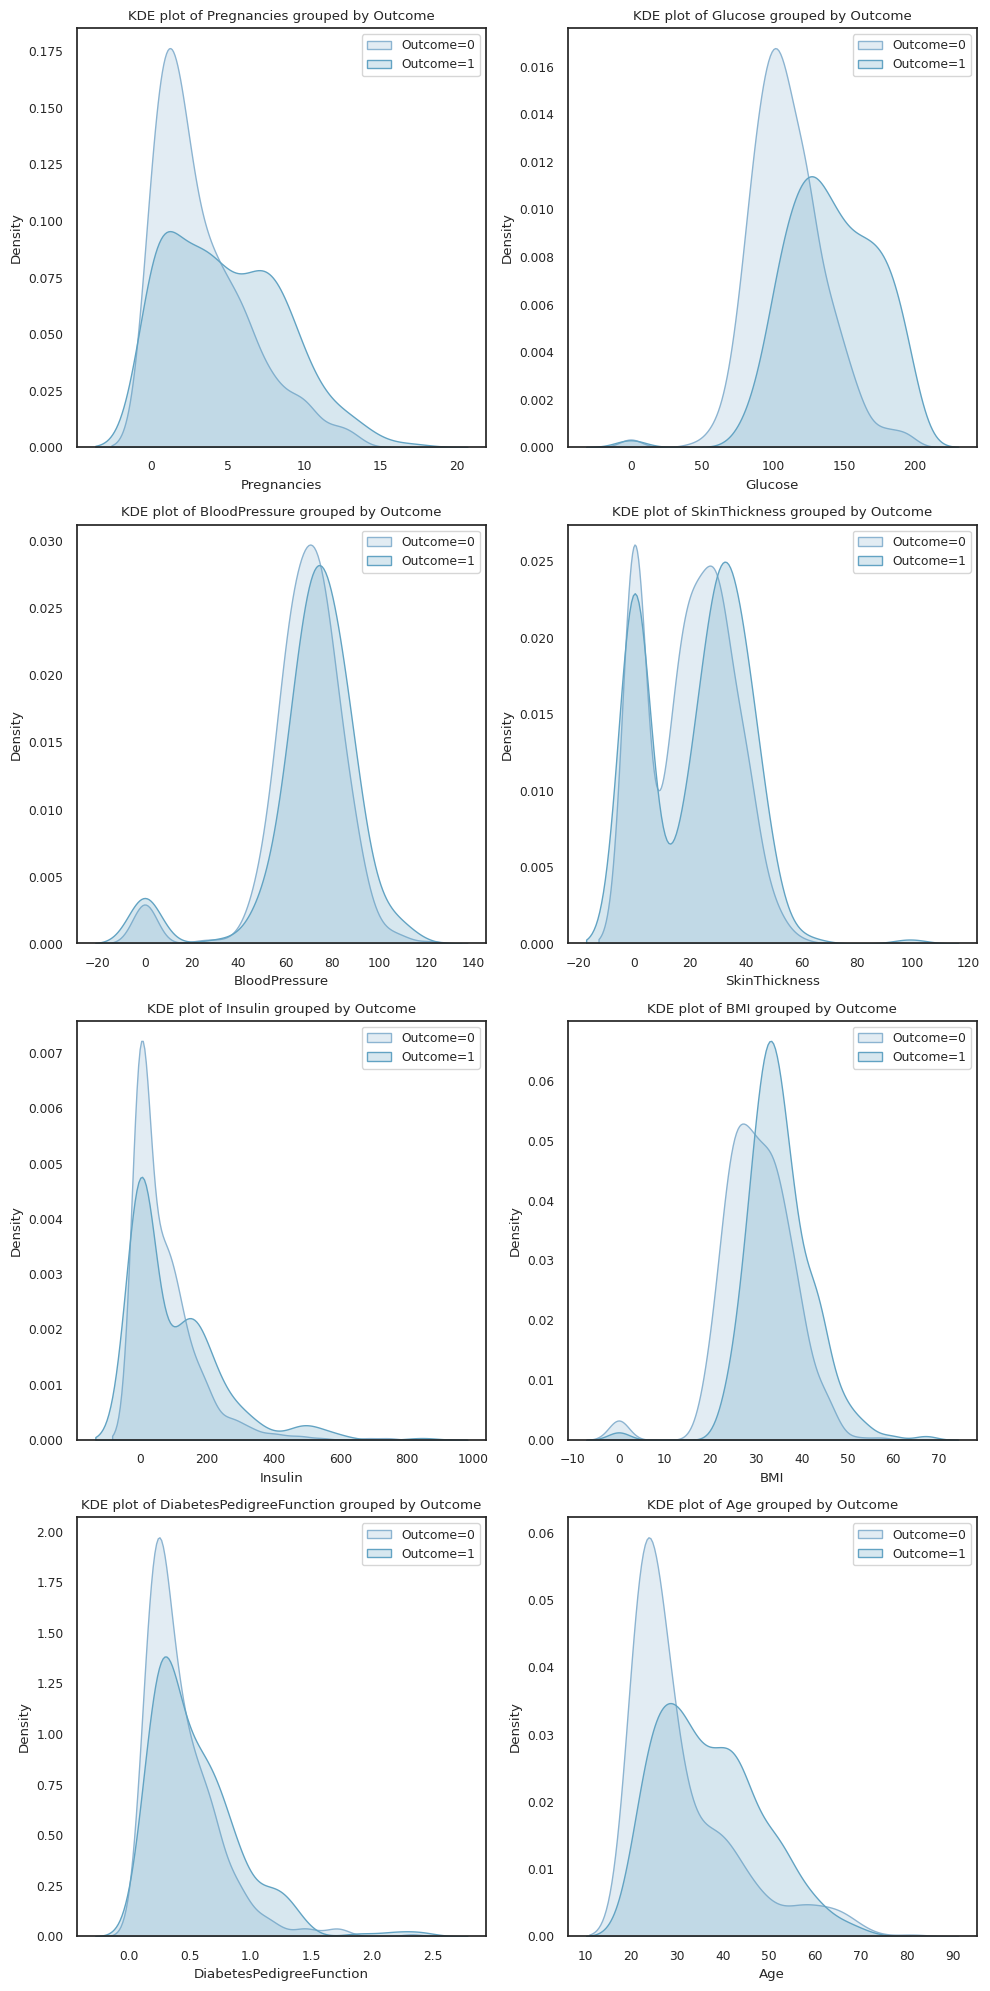

In [155]:
# Bivariate Analysis
# KDE plots for each variable grouped by the Outcome
num_columns = len(df.columns.drop('Outcome'))
num_rows = (num_columns + 1) // 2

plt.figure(figsize=(10, 5*num_rows))
for i, column in enumerate(df.columns.drop('Outcome')):
    plt.subplot(num_rows, 2, i+1)
    sns.kdeplot(data=df[df['Outcome']==0][column], label='Outcome=0', fill=True)
    sns.kdeplot(data=df[df['Outcome']==1][column], label='Outcome=1', fill=True)
    plt.title(f'KDE plot of {column} grouped by Outcome')
    plt.legend()

plt.tight_layout()
plt.show()

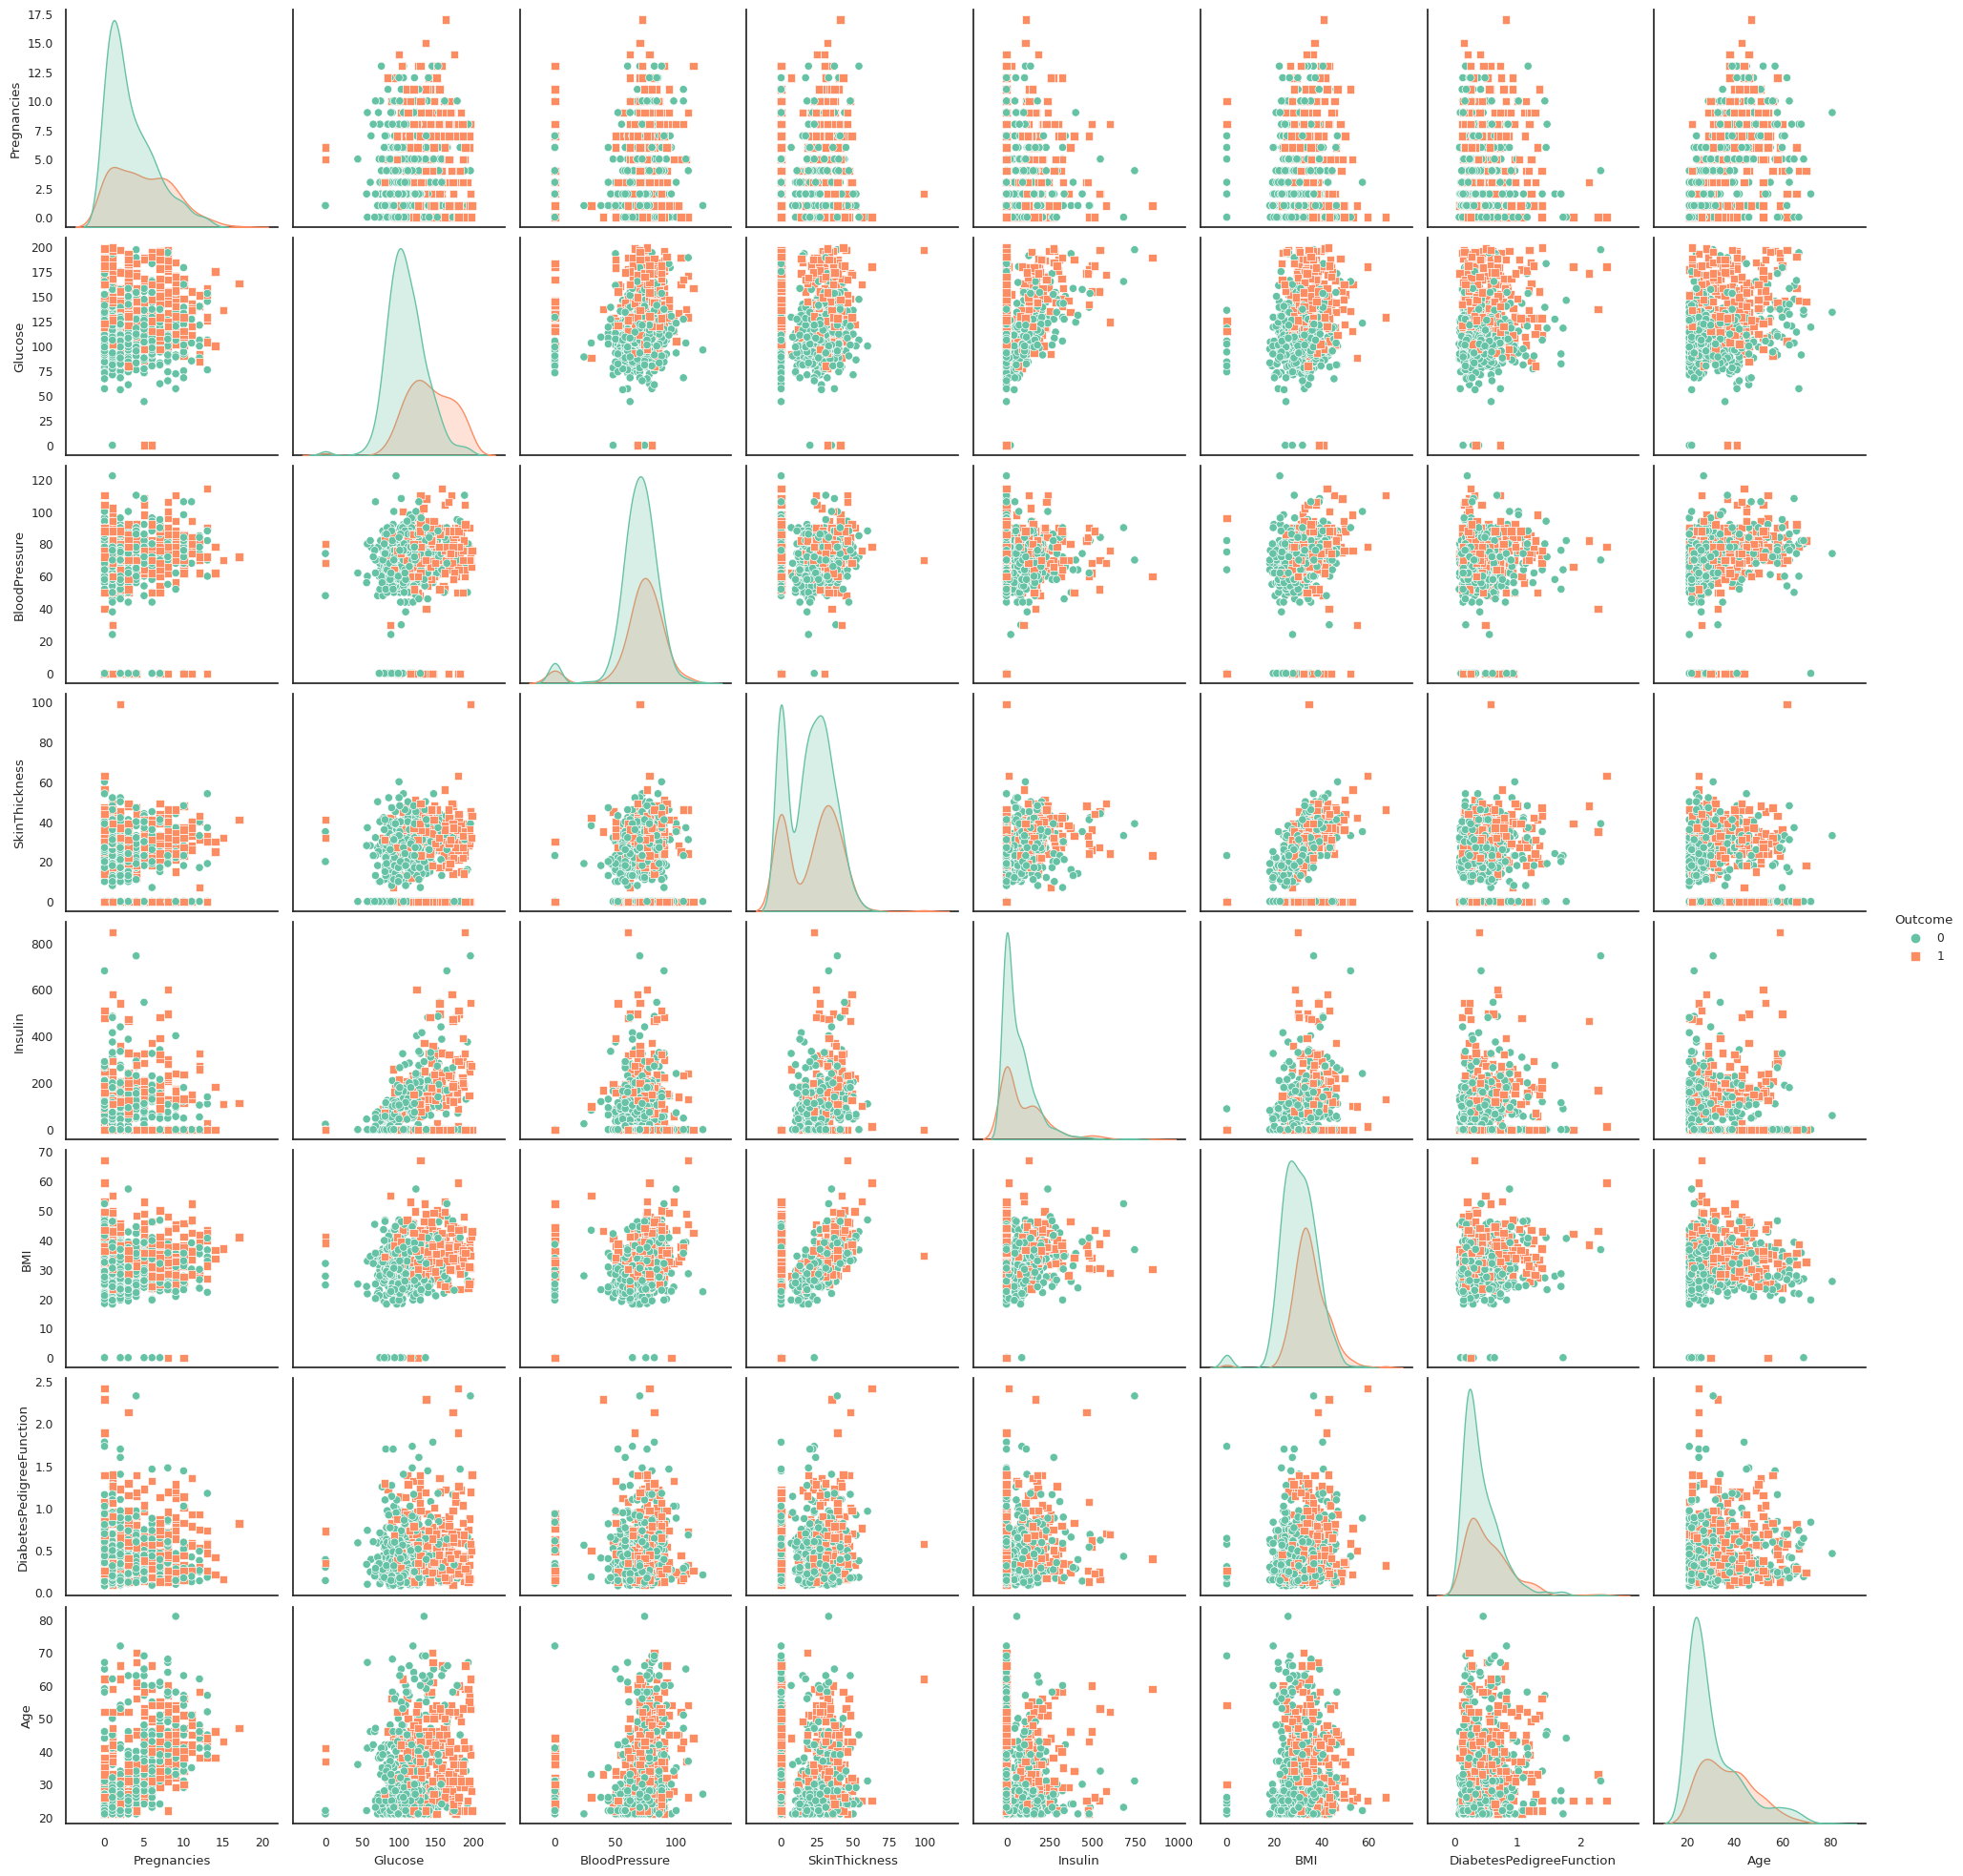

In [156]:
# Multivariate Analysis
# 0. Pairplot for all variables
sns.pairplot(df, hue='Outcome', markers=["o", "s"], palette="Set2")
plt.show()

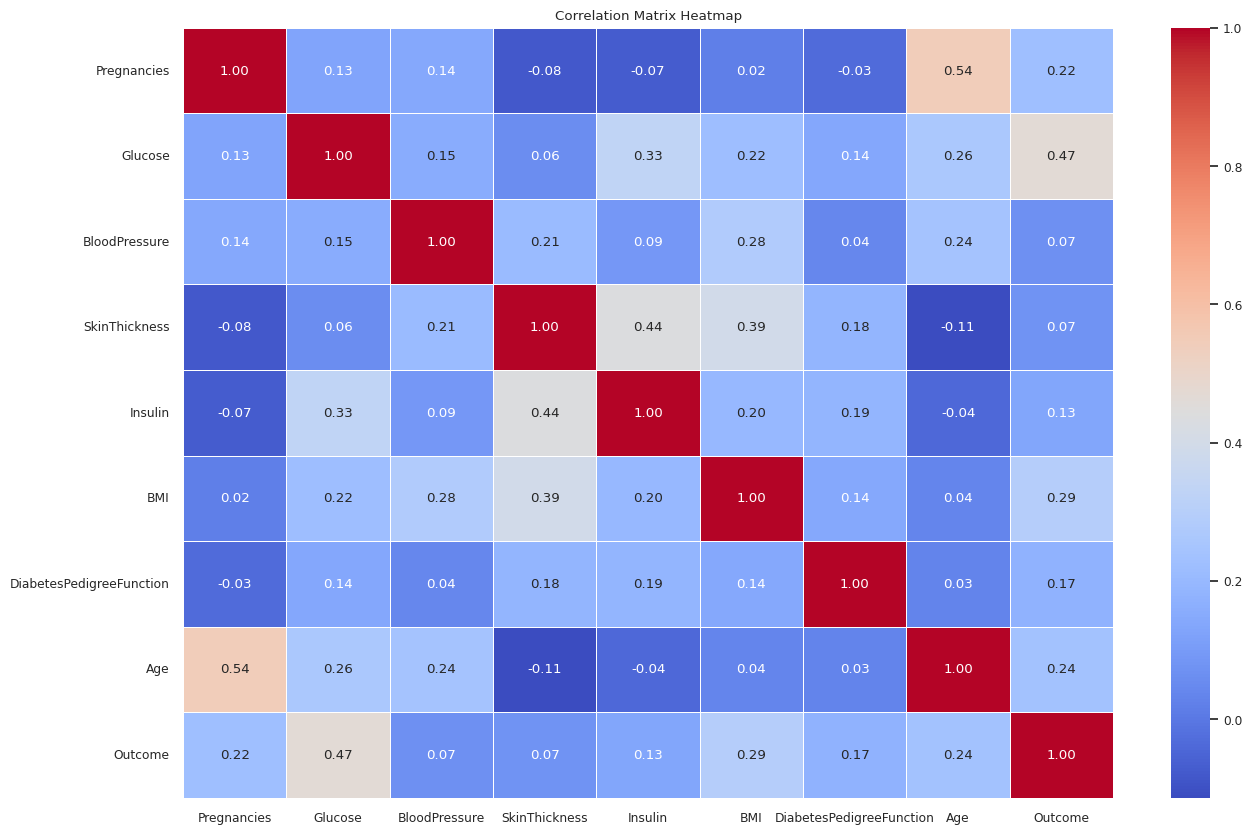

In [157]:
#Graph I.
correlation_matrix = df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

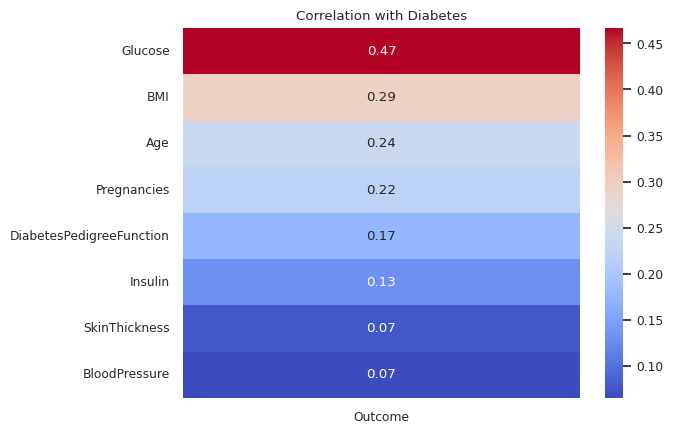

In [158]:
#Graph II
corr = df.corr()
target_corr = corr['Outcome'].drop('Outcome')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

# Create a heatmap of the correlations with the target column
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

In [159]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

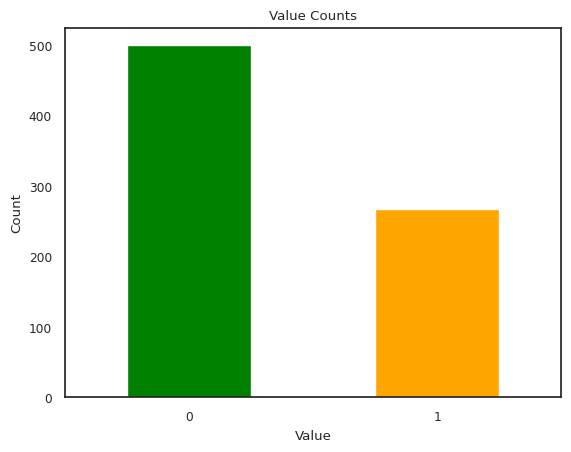

In [160]:
value_counts = df['Outcome'].value_counts()
value_counts.plot(kind='bar',color = ['green' , 'orange'])
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Value Counts')
plt.xticks(rotation=0)
plt.show()

In [161]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [162]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [163]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred,average = "weighted")
recall = recall_score(y_test,y_pred,average = "weighted")
f1 = f1_score(y_test,y_pred,average = "weighted")
conf_matrix = confusion_matrix(y_test,y_pred)

print("KNN Accuracy:", int(100*accuracy),"%")
print("KNN Precision:", precision)
print("KNN Recall:", recall)
print("KNN F1 score:", f1)
print("Confusion Matrix")
print(conf_matrix)

KNN Accuracy: 71 %
KNN Precision: 0.7085394763966192
KNN Recall: 0.7186147186147186
KNN F1 score: 0.7093867470043018
Confusion Matrix
[[127  24]
 [ 41  39]]


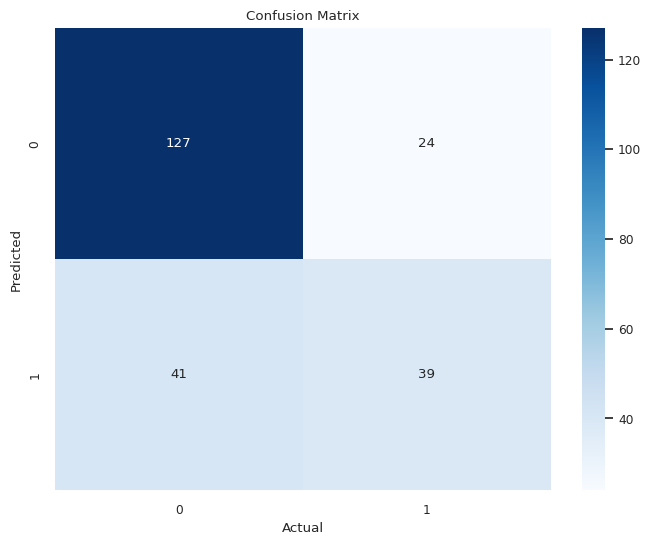

In [132]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True,cmap='Blues',fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [164]:
y_pred = g.predict([[2,105,58,40,94,34.9,0.225,25],
[6, 148, 72, 35, 0, 33.6, 0.627, 50],
[1, 85, 66, 29, 0, 26.6, 0.351, 31],
[8, 183, 64, 0, 0, 23.3, 0.672, 32],
[1, 89, 66, 23, 94, 28.1, 0.167, 21]])
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0, 1, 0, 1, 0])

In [165]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred,average = "weighted")
recall = recall_score(y_test,y_pred,average = "weighted")
f1 = f1_score(y_test,y_pred,average = "weighted")
conf_matrix = confusion_matrix(y_test,y_pred)

print("DTC Accuracy:", int(100*accuracy),"%")
print("DTC Precision:", precision)
print("DTC Recall:", recall)
print("DTC F1 score:", f1)
print("Confusion Matrix")
print(conf_matrix)

DTC Accuracy: 70 %
DTC Precision: 0.7307271852726398
DTC Recall: 0.70995670995671
DTC F1 score: 0.7156136333939994
Confusion Matrix
[[108  43]
 [ 24  56]]


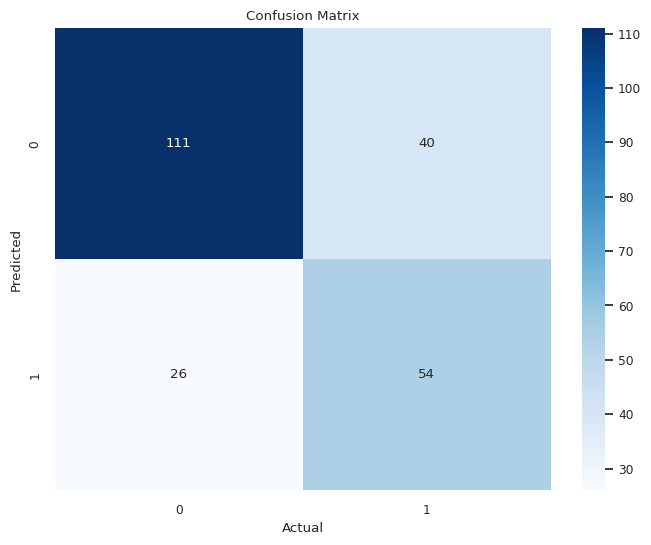

In [134]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True,cmap='Blues',fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [166]:
y_pred = g.predict([[2,105,58,40,94,34.9,0.225,25],
[6, 148, 72, 35, 0, 33.6, 0.627, 50],
[1, 85, 66, 29, 0, 26.6, 0.351, 31],
[8, 183, 64, 0, 0, 23.3, 0.672, 32],
[1, 89, 66, 23, 94, 28.1, 0.167, 21]])
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0, 1, 0, 1, 0])

In [167]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred,average = "weighted")
recall = recall_score(y_test,y_pred,average = "weighted")
f1 = f1_score(y_test,y_pred,average = "weighted")
conf_matrix = confusion_matrix(y_test,y_pred)

print("RFC Accuracy:", int(100*accuracy),"%")
print("RFC Precision:", precision)
print("RFC Recall:", recall)
print("RFC F1 score:", f1)
print("Confusion Matrix")
print(conf_matrix)

RFC Accuracy: 75 %
RFC Precision: 0.7562198150433445
RFC Recall: 0.7575757575757576
RFC F1 score: 0.756838875093372
Confusion Matrix
[[124  27]
 [ 29  51]]


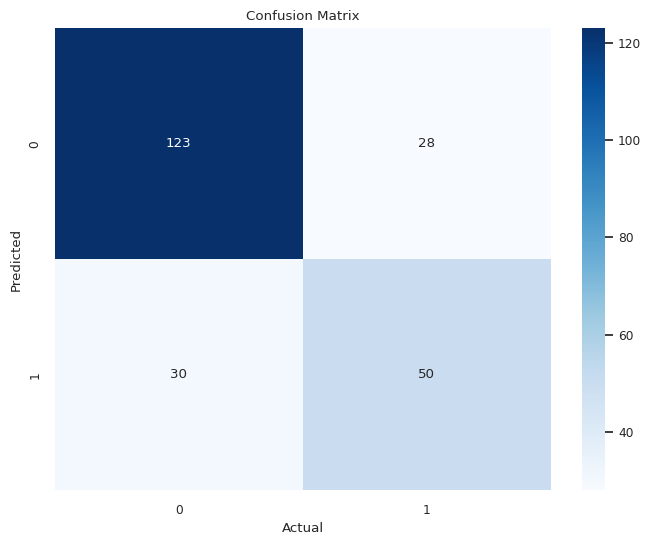

In [136]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True,cmap='Blues',fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [168]:
y_pred = g.predict([[2,105,58,40,94,34.9,0.225,25],
[6, 148, 72, 35, 0, 33.6, 0.627, 50],
[1, 85, 66, 29, 0, 26.6, 0.351, 31],
[8, 183, 64, 0, 0, 23.3, 0.672, 32],
[1, 89, 66, 23, 94, 28.1, 0.167, 21]])
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0, 1, 0, 1, 0])

In [137]:
g=GaussianNB()
g.fit(X_train,y_train)
y_pred = g.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred,average = "weighted")
recall = recall_score(y_test,y_pred,average = "weighted")
f1 = f1_score(y_test,y_pred,average = "weighted")
conf_matrix = confusion_matrix(y_test,y_pred)

print("GNB Accuracy:", int(100*accuracy),"%")
print("GNB Precision:", precision)
print("GNB Recall:", recall)
print("GNB F1 score:", f1)
print("Confusion Matrix")
print(conf_matrix)

GNB Accuracy: 74 %
GNB Precision: 0.7487346121512117
GNB Recall: 0.7445887445887446
GNB F1 score: 0.7463086857026251
Confusion Matrix
[[119  32]
 [ 27  53]]


In [169]:
y_pred = g.predict([[2,105,58,40,94,34.9,0.225,25],
[6, 148, 72, 35, 0, 33.6, 0.627, 50],
[1, 85, 66, 29, 0, 26.6, 0.351, 31],
[8, 183, 64, 0, 0, 23.3, 0.672, 32],
[1, 89, 66, 23, 94, 28.1, 0.167, 21]])
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0, 1, 0, 1, 0])

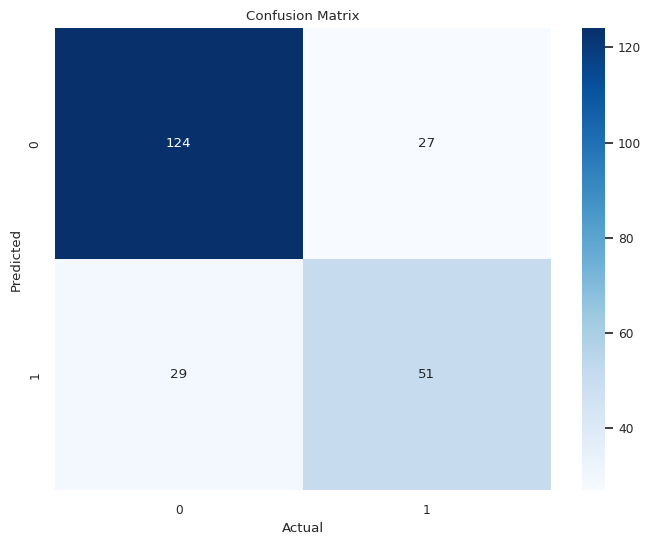

In [170]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True,cmap='Blues',fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [171]:
svm=SVC()
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred,average = "weighted")
recall = recall_score(y_test,y_pred,average = "weighted")
f1 = f1_score(y_test,y_pred,average = "weighted")
conf_matrix = confusion_matrix(y_test,y_pred)

print("SVM Accuracy:", int(100*accuracy),"%")
print("SVM Precision:", precision)
print("SVM Recall:", recall)
print("SVM F1 score:", f1)
print("Confusion Matrix")
print(conf_matrix)

SVM Accuracy: 73 %
SVM Precision: 0.7267842852194449
SVM Recall: 0.7359307359307359
SVM F1 score: 0.7245673526716804
Confusion Matrix
[[131  20]
 [ 41  39]]


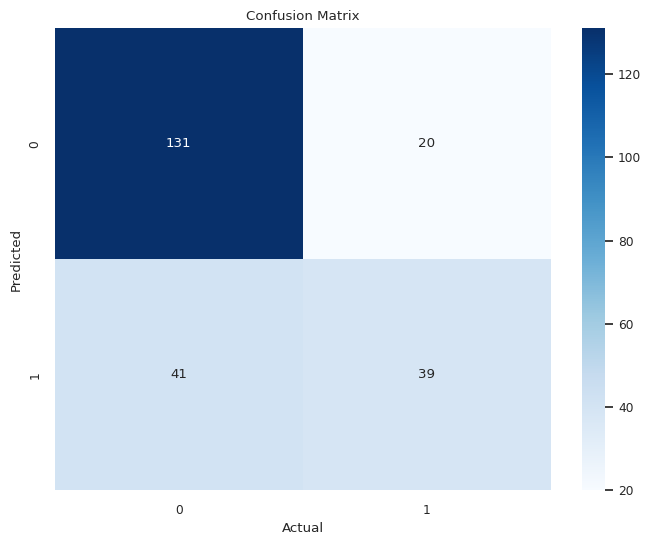

In [172]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True,cmap='Blues',fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [173]:
y_pred = g.predict([[2,105,58,40,94,34.9,0.225,25],[6, 148, 72, 35, 0, 33.6, 0.627, 50],
[1, 85, 66, 29, 0, 26.6, 0.351, 31],
[8, 183, 64, 0, 0, 23.3, 0.672, 32],
[1, 89, 66, 23, 94, 28.1, 0.167, 21]])
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0, 1, 0, 1, 0])

Conclusion

In summary , I think Gaussian Naive Bayes, SVM classification algorithm is the most suitable for my diabetes dataset, because its accuracy and precision rate are superior to other algorithms